# t-SNE

##### 패키지 불러오기

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
from multiprocessing import Pool
import time
import matplotlib.patheffects as PathEffects
from scipy.spatial import distance_matrix
import seaborn as sns
from matplotlib.pyplot import style
from sklearn.manifold import TSNE

import warnings
from scipy.spatial.distance import cdist
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
warnings.filterwarnings('ignore')


random.seed(9697)
np.random.seed(9697)

##### MNIST 데이터셋 불러오기
##### 전체 데이터셋 중 1/30만 사용했음

In [2]:
mnist = fetch_openml('mnist_784')
df = mnist.data
df['target'] =mnist.target 
data = mnist.data[::30]
target = mnist.target[::30]

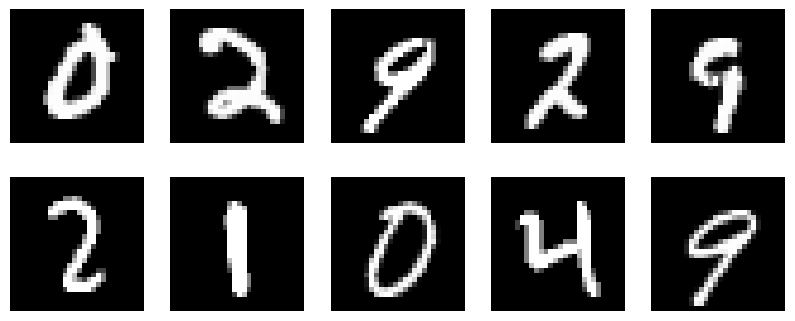

In [3]:
# 0~69999 숫자 중 랜덤으로 10개 선별(인덱스 기준)
random_idx = np.random.choice(70000, 10)

# 흰색 배경 및 크기 지정
style.use('default')
figure = plt.figure()
figure.set_size_inches(10, 4)

# 시각화를 위한 target column 제외
columns_list = list(df.columns)
columns_list.remove('target')

# 흑백으로 출력하기 위한 스타일 설정
style.use('grayscale')

# 2 * 5 사이즈의 격자 설정
axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))

num_list = []
for i in range(10):
    num = df.loc[random_idx[i], columns_list] # 랜덤으로 선별된 인덱스 위치에 해당하는 픽셀 정보 가져오기
    num = np.array(num).reshape(-1, 28).astype(int) # 픽셀값을 28 * 28 사이즈로 바꾸고 정수형 변환 진행
    num_list.append(num)

for i in range(10):
    axes[i].matshow(num_list[i]) # 10개 숫자 차례대로 시각화
    axes[i].set_axis_off() # x축, y축 눈금 제거

In [4]:
print(f'data shape : {data.shape} | targets shape : {target.shape}')

data shape : (2334, 785) | targets shape : (2334,)


##### sklearn 패키지를 사용하여 t-SNE수행

In [8]:
dim = 2 # embedding dimensions
perplexity = 5 # perplexity
s_time = time.time()
t_sne = TSNE(n_components=dim, perplexity=perplexity, random_state=0)
t_sne = t_sne.fit_transform(data)
required_time = time.time()-s_time

print(f't-SNE required time with samples {data.shape[0]} : {required_time}')

t-SNE required time with samples 2334 : 3.730149745941162


##### t-SNE를 이용하여 시각화

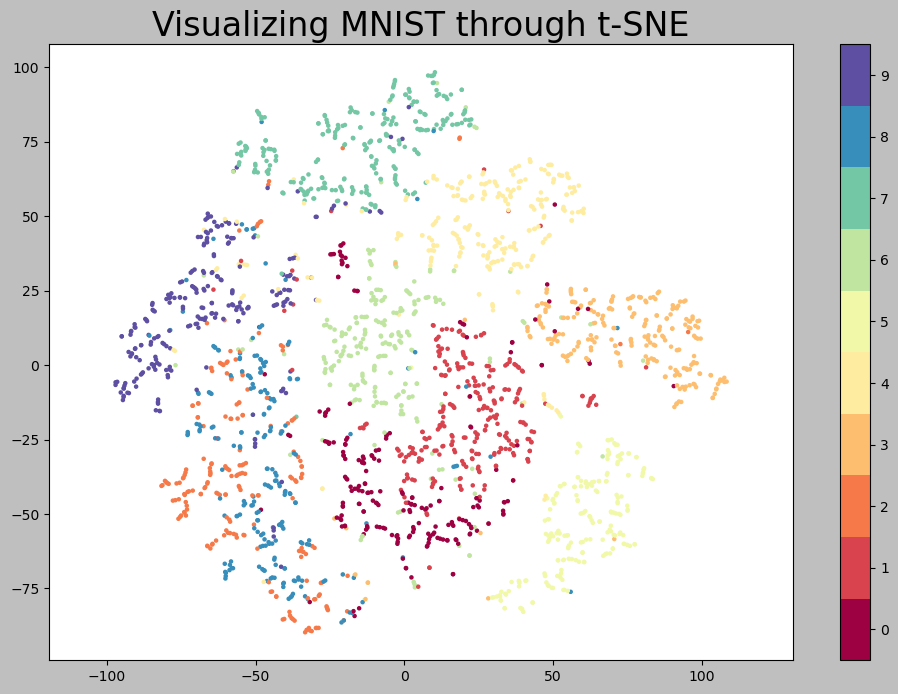

In [30]:
plt.figure(figsize=(12, 8))
plt.scatter(t_sne[:, 0], t_sne[:, 1], s= 5, c=pd.factorize(target)[0], cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST through t-SNE', fontsize=24)
plt.show()

##### t-SNE를 3D로 시각화

###### t-SNE 알고리즘을 사용하기 전에 PCA를 사용해서 차원축소 진행

In [20]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data)

In [21]:
# Using the output of PCA as input for t-SNE
%time
pca_tsne = TSNE(random_state = 9697, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

pca_tsne2 = TSNE(random_state = 42, n_components=3, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

Wall time: 0 ns


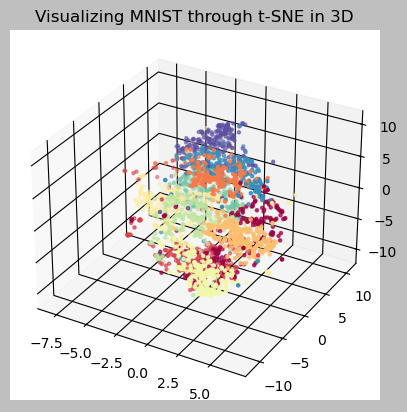

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_tsne2[:, 0], pca_tsne2[:, 1],pca_tsne2[:,2], s= 5, c=pd.factorize(target)[0], cmap='Spectral')
plt.title('Visualizing MNIST through t-SNE in 3D');
plt.show()